# Descriptive analysis of the data 

In the following we analyse and describe the flight data. The target is to receive information about the data structure, to find anomalies and to get an idea of which new features could be build and needed. 

The following Python code loads in the csv data and displays the structure of the data and parse the dates. 

In [118]:
# Pandas is used for data manipulation
import pandas as pd
import datetime
# Read in data and display first 5 rows
flight_data = pd.read_csv("./data/train.csv", parse_dates=['Flight_Date','Request_Date'])
flight_data.head(5)

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


###### Following are the explanations of the columns: 

Request_Date: Date/time of the price request

Flight_Date: date of the flight

Departure_hour: rounded departure time

flight_unique_id: unique ID of the flight

route_abb: shortcut of the route

flight_number: flight number

Price: price of the flight

Currency: currency of the price

min_future_price: minimal price of the flight between time of the request and flight date  

#### Identify anomalies and missing data 
We notice that there are 83.624 rows and 9 columns which represents the features. The target in this case is the feature min_future_price. There are not any data points that immediately appear as anomalous and no zeros in any of the measurement columns. This means the quality of the data is good.  

In [26]:
print('The shape of our training data is:', flight_data.shape)

The shape of our training data is: (83624, 9)


In [27]:
# Check if there are any nulls in the flight_data
print('Any null values: ', flight_data.isnull().values.any())

Any null values:  False


In [32]:
# See the column data types and if there are any null rows 
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Request_Date      83624 non-null  datetime64[ns, UTC]
 1   Flight_Date       83624 non-null  datetime64[ns]     
 2   Departure_hour    83624 non-null  int64              
 3   flight_unique_id  83624 non-null  object             
 4   route_abb         83624 non-null  object             
 5   flight_number     83624 non-null  object             
 6   Price             83624 non-null  float64            
 7   Currency          83624 non-null  object             
 8   min_future_price  83624 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.7+ MB


In [29]:
# To compute anomalies we compute summary statistics 
flight_data.describe()

,Departure_hour,Price,min_future_price
count,83624.000000,83624.000000,83624.000000
mean,12.969889,68.161822,53.703764
std,6.177936,51.927907,43.785672
min,6.000000,8.990000,8.990000
25%,7.000000,30.330000,19.990000
50%,10.000000,52.010000,39.460000
75%,19.000000,88.730000,73.430000
max,22.000000,334.870000,311.090000


Another method to verify the quality of the data is make basic plots. Therefore we calculated some more features, like the duration in hours between the request and flight date, we converted all prices to eur and we build time of day features.

In [122]:
# Read in the new converted data and display first 5 rows
flight_data_conv = pd.read_csv("./data/converted_train_2020_07_15_12-33-08.csv", index_col=0, parse_dates=['Flight_Date','Request_Date'])
flight_data_conv.head(5)

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,...,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour,Request_Date_Month,Flight_Date_Month,route_abb_from,route_abb_to
0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,...,259.070000,Monday,Morning,Evening,907.2,11:00,6,6,SXF,STN
1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Monday,Night,Evening,907.2,23:00,6,6,SXF,STN
2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Tuesday,Morning,Evening,907.2,11:00,6,6,SXF,STN
3,2019-06-04 23:00:00,2019-06-05 19:00:00,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Tuesday,Night,Evening,907.2,23:00,6,6,SXF,STN
4,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,...,252.059401,Monday,Morning,Night,907.2,11:00,6,6,STN,SXF


In [49]:
# Drop the old min_future_price and price column. We will use only the EUR prices 
flight_data_conv = flight_data_conv.drop(columns=['min_future_price', 'Price'])

#### Plot the data 
In the following we plot the requested prices and min_future_prices on a 2-D graph to eyeball the data and see if we can manually find any relationship between the data.

In [50]:
# matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 

# Set the style
plt.style.use('seaborn')

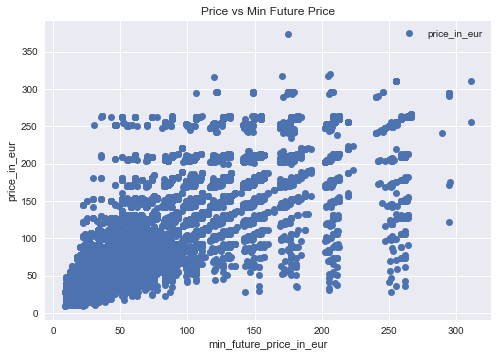

In [51]:
flight_data_conv.plot(x='min_future_price_in_eur', y='price_in_eur', style='o')  
plt.title('Price vs Min Future Price')  
plt.xlabel('min_future_price_in_eur')  
plt.ylabel('price_in_eur')  
plt.show()

We can see that there is a relationship between the price and min future price. Most of the data points are in the area around 0 to 100 EUR.

With the help of the following plots we can notice that the average min_future_price and the average requested price increase when the request date is later. 
From 01.06.2019 until 17.07.2019 the min future price increases almost linear from 39EUR to 60EUR. The price decreases afterwards and growth rapidly from 55EUR to 90EUR in the time of 22.07.2019 until the 01.08.2019.
There is a bigger fluctuation if we look at the average requested prices for the same period. There are price changes within a week. We can also notice that the price increases extremly at the end of june from 65EUR up to 85EUR until the 07.07.2019. After this week the price decreases again to 70EUR until the 22.07.20. Afterwards the price increases until 01.08.2019 over 90EUR and takes a little downfall afterwards. We notice that the min future price and the requested price increases rapidly after the 22.07.2019. 

In [123]:
# format the request date to date format for the plots
from datetime import datetime,date
flight_data_conv['Request_Date'] = pd.to_datetime(flight_data_conv['Request_Date']).dt.date
flight_data_conv['Flight_Date'] = pd.to_datetime(flight_data_conv['Flight_Date']).dt.date

In [174]:
# Calculate average values and unique dates for the plots
dates = flight_data_conv.Request_Date.unique()
flight_dates = flight_data_conv.Flight_Date.unique()
days = flight_data_conv.Request_Weekday.unique()
time_of_day = flight_data_conv.Request_timeofday.unique()
duration = flight_data_conv.Duration_Time.unique()
distance = flight_data_conv.flight_distance_km.unique()

mean_min_feature_price = flight_data_conv.groupby('Request_Date').min_future_price_in_eur.mean()
mean_price = flight_data_conv.groupby('Request_Date').price_in_eur.mean()
mean_price_duration = flight_data_conv.groupby('Duration_Time').price_in_eur.mean()
mean_min_future_duration = flight_data_conv.groupby('Duration_Time').min_future_price_in_eur.mean()
mean_price_weekday = flight_data_conv.groupby('Request_Weekday').price_in_eur.mean()
mean_min_future_weekday = flight_data_conv.groupby('Request_Weekday').min_future_price_in_eur.mean()

mean_min_future_flight_date = flight_data_conv.groupby('Flight_Date').min_future_price_in_eur.mean()
mean_price_flight_date = flight_data_conv.groupby('Flight_Date').price_in_eur.mean()

mean_price_distance = flight_data_conv.groupby('flight_distance_km').price_in_eur.mean()
mean_min_future_distance = flight_data_conv.groupby('flight_distance_km').min_future_price_in_eur.mean()

Text(0.5, 1.0, 'Avg requested price')

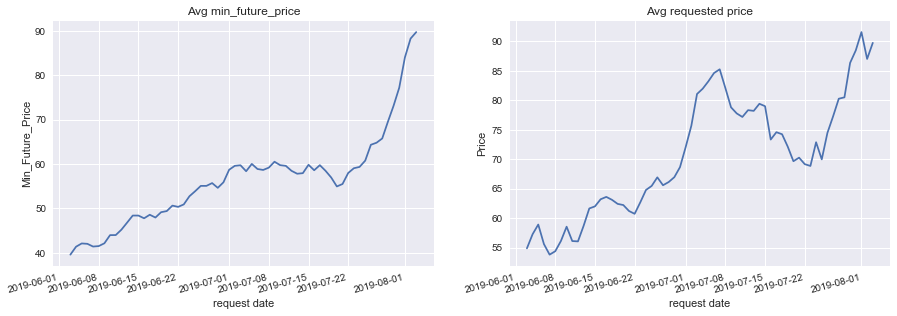

In [42]:
# Set up the plotting layout
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 15)

# avg min_future_price_in_eur compared to the request date
ax1.plot(dates, mean_min_feature_price)
ax1.set_xlabel('request date'); ax1.set_ylabel('Min_Future_Price'); ax1.set_title('Avg min_future_price')

# avg price in eur compared to the request date
ax2.plot(dates, mean_price)
ax2.set_xlabel('request date'); ax2.set_ylabel('Price'); ax2.set_title('Avg requested price')

The plots below show us that the average min future price is higher for the flights with flight dates in june and july. In the first half of june the min future price is between 180 EUR and 100 EUR. The min future price is in the second half of august between 75 EUR and 30 EUR. After the first september the min future price goes down up to 15EUR. 
The average requested prices for the flight dates have the same pattern but with a higher fluctuation. In the first half of june the price is between 180 EUR and 110EUR. From the second half of june until the second half of july the price is between 140 EUR and 70 EUR. The lowest prices can be found after the first september. The price is between 50 EUR and 20 EUR.
We can also notice for both cases that the prices are always high at the beginning and end of a month. Within the first or third week of a month the prices seem to be lower. 

Text(0.5, 1, 'Avg requested price')

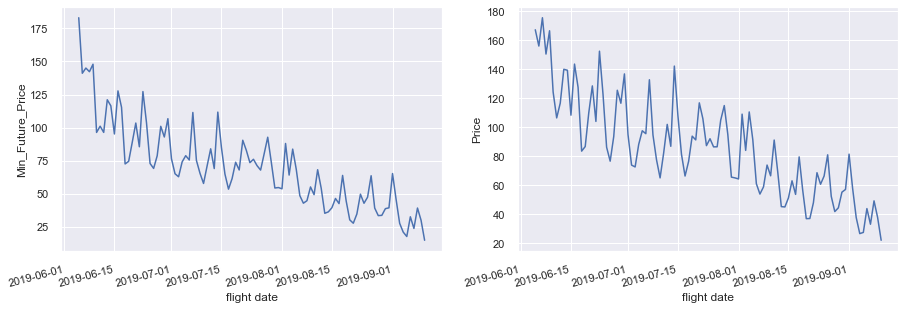

In [175]:
# Set up the plotting layout
fig, ((ax7, ax8)) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 15)

# avg min_future_price_in_eur compared to the request date
ax7.plot(flight_dates, mean_min_future_flight_date)
ax7.set_xlabel('flight date'); ax7.set_ylabel('Min_Future_Price'); ax1.set_title('Avg min_future_price')

# avg price in eur compared to the request date
ax8.plot(flight_dates, mean_price_flight_date)
ax8.set_xlabel('flight date'); ax8.set_ylabel('Price'); ax2.set_title('Avg requested price')

In the following we look at the average prices and the average min future prices in regards to the duration between the request and the flight date. 
We can notice that the prices and min future price increase when the duration time between the flight date and request date is short. The min future price lies between 12EUR and 45EUR with a duration of 2400-1250 hours. From then the min future price lies between 25EUR and 50EUR with a duration of 1250-800 hours. Afterwards the min future price increases until 200EUR. In the duration of 250-0 hours the min future price lies between 65EUR and 190EUR.
The curve of the price plot looks very similar to the min future price curve. At the duration of 2400-2200 hours the price lies between 25EUR and 40EUR. Afterwards the price lies between 25EUR and 65EUR until a duration of 1000 hours. Between 1000-500 hours the average price lies between 45EUR and 100EUR. Between 500-0 hours the average price lies between 75EUR and 190 EUR.

Text(0.5, 1.0, 'Price to duration')

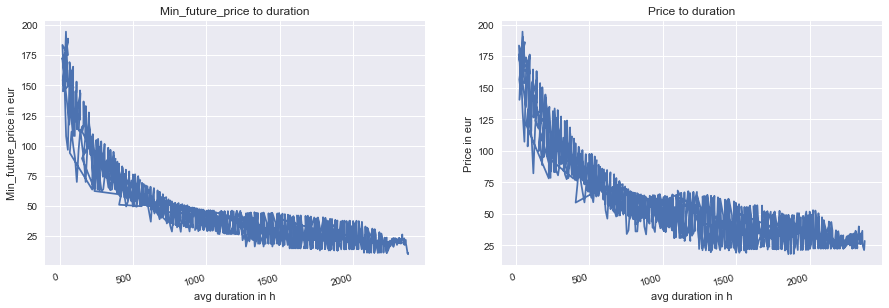

In [55]:
# Set up the plotting layout
fig, ((ax3, ax4)) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 15)

# avg min_future_price_in_eur compared to the avg duration time
ax3.plot(duration, mean_min_future_duration)
ax3.set_xlabel('avg duration in h'); ax3.set_ylabel('Min_future_price in eur'); ax3.set_title('Min_future_price to duration')

# avg price in eur compared to the avg duration time
ax4.plot(duration, mean_price_duration)
ax4.set_xlabel('avg duration in h'); ax4.set_ylabel('Price in eur'); ax4.set_title('Price to duration')

In the plot below we look at the weekdays and the average min future price and requested prices. 
We can see that the average min future price is on monday the highest and is 58EUR. On tuesday the min future price decreases down to 55EUR. On wednesday the min future price increases again up to 57EUR, on thursday the it decreases down to 56EUR. On friday it increases a lot up to 58EUR and on saturday the min future price falls again to 56EUR. On sunday the price increases again up to 57EUR. 
For the requested average prices we notice that the prices are alos on monday and sunday high with 72.25EUR but on wednesday the price is the highest with 72.80EUR. On tuesday and saturday the prices drop and have a value of 71EUR. 

Text(0.5, 1.0, 'Price to weekday')

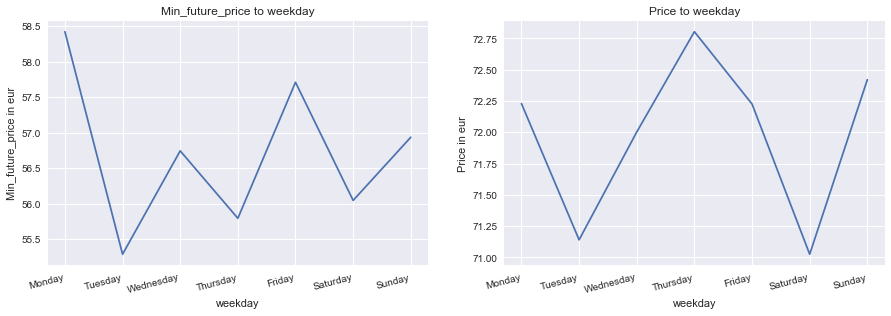

In [56]:
# Set up the plotting layout
fig, ((ax5, ax6)) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 15)

# avg min_future_price_in_eur compared to the weekday
ax5.plot(days, mean_min_future_weekday)
ax5.set_xlabel('weekday'); ax5.set_ylabel('Min_future_price in eur'); ax5.set_title('Min_future_price to weekday')

# avg price_in_eur compared to the weekday
ax6.plot(days, mean_price_weekday)
ax6.set_xlabel('weekday'); ax6.set_ylabel('Price in eur'); ax6.set_title('Price to weekday')

In the plot below we analyzed the prices in regards to the time of the day like AM or PM. For 175 unique flights we could notice that the requested prices were higher at PM. 

In [150]:
# Get unique request date and unique_id
data_am_pm_analysis = flight_data_conv
data_am_pm_analysis['Request_Date'] = pd.to_datetime(data_am_pm_analysis["Request_Date"].dt.strftime('%Y-%m-%d'))
data_am_pm_analysis['Flight_Date'] = pd.to_datetime(data_am_pm_analysis["Flight_Date"].dt.strftime('%Y-%m-%d'))

In [176]:
# check if price changes with the time of the day (AM or PM)
d = {'Request_Date': [], 'flight_unique_id': [], 'am_more_expensive': []}
data_am_pm_analysis_results = pd.DataFrame(d)

# Iterate over normalized data to check if AM price is more expensive than PM price (unique key = Request_Date, flight_unique_id)
for index_x, row_x in data_am_pm_analysis.iterrows():
    # Interate over every entry again to check if unique key appears again (corresponding PM value)
    for index_y, row_y in data_am_pm_analysis.iterrows():
        if row_x.Request_Date == row_y.Request_Date and row_x.flight_unique_id == row_y.flight_unique_id and row_x.Request_AM_PM == 'AM' and row_y.Request_AM_PM == 'PM':
           # print(row_x.Request_Date)
            if row_x.price_in_eur > row_y.price_in_eur:
                new_row = {'Request_Date': row_x.Request_Date, 'flight_unique_id': row_x.flight_unique_id, 'am_more_expensive': 1 }
                data_am_pm_analysis_results = data_am_pm_analysis_results.append(new_row, ignore_index=True)
            else:
                new_row = {'Request_Date': row_x.Request_Date, 'flight_unique_id': row_x.flight_unique_id, 'am_more_expensive': 0 }
                data_am_pm_analysis_results = data_am_pm_analysis_results.append(new_row, ignore_index=True)

In [63]:
# data show if price in eur was higher in the evening or in the morning
# true 1 if price was higher at AM else 0 it was higher at PM
data_am_pm_analysis_results

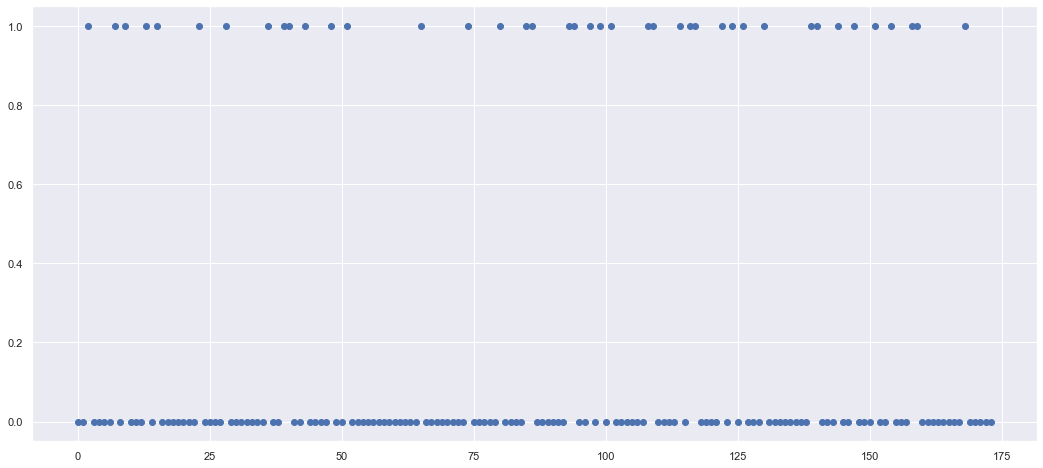

In [74]:
data_am_pm_analysis_results['am_more_expensive'].plot(style='o')

#### Summary 
After plotting the data we can assume, that the duration and the weekday have an impact on the min future price. 
We can also tell that the prices are relevant for the min future price. 
For now we can say that the customer can save money if he buys the flight ticket with a duration between the request and flight date of 2400-1250 hours. Hereby the customer would make the highest price saving if he buys the ticket within this period on a tuesday and in the morning. The customer would also save money if he buys a flight ticket for flights with departure in september or later. The customer should avoid flights with flight dates in the beginning of june and at the end or beginning of a month.  

#### Analyse the number of price changes and max price changes
In the following we will analyse the number of price changes for the routes and the max price diffrence. The data show the total number of price requests and unique number of price changes per route from 03.06.19-01.08.19. It shows the min, max, mean prices for each route and the max difference of price changes per route.

Route FRA-STN: 14.950 price requests, 68 price changes, max. price difference: 302.10€
Route STN-FRA: 14.593 price requests, 588 price changes, max. price difference: 358.79€
Route STN-SXF: 26.489 different flights, 555 price changes, max. price difference: 309.11€
Route SXF-STN: 27.592 different flights, 66 price changes, max. price difference: 285.83€

In [148]:
#number of flights per route
flight_data_conv.groupby('route_abb').flight_number.size()

route_abb
FRA-STN    14950
STN-FRA    14593
STN-SXF    26489
SXF-STN    27592
Name: flight_number, dtype: int64

In [168]:
##number of price changes aggregated over each route 
price_route = round(flight_data_conv.groupby('route_abb').price_in_eur.agg(['nunique','min', 'max', 'mean']), 2)
price_route = pd.DataFrame(price_route) 
#price_route

In [169]:
# calculates the difference between the min and max price for each route
max_price_change_route = price_route['max'] - price_route['min']
price_route['max_price_change'] = max_price_change_route
price_route

,nunique,min,max,mean,max_price_change
route_abb,,,,,
FRA-STN,186,8.99,311.09,61.45,302.10
STN-FRA,2558,14.17,372.96,67.55,358.79
STN-SXF,2900,11.21,320.32,77.36,309.11
SXF-STN,160,9.99,295.82,74.79,285.83


In [143]:
# import for the plot
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

The following plot shows the min, max, mean requested prices for each route and the max price change. There are no anomilies between these routes. We can only notice that the price changes the most for the route STN-FRA with a change of 358.79EUR. The lowest price difference has the route SXF-STN with an amount of 285.83EUR. 
We can also see that the price changes the most for the routes STN-FRA and STN-SXF. 

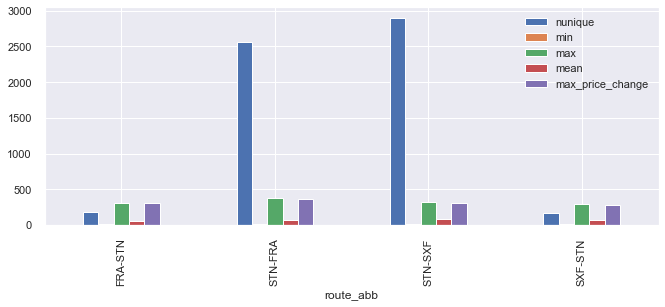

In [165]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot(kind = 'bar')

The data below show the min, max, mean prices for each flight number. It shows also the max price difference per flight the number of unique price changes. 

In [160]:
# number of price changes aggregated over each flight number 
price_flight_number = round(flight_data_conv.groupby('flight_number').price_in_eur.agg(['nunique', 'min', 'max', 'mean']), 2)
price_flight_number = pd.DataFrame(price_flight_number) 

In [161]:
# calculates the difference between the min and max price for each flight
max_price_difference_flight = price_flight_number['max'] - price_flight_number['min']
price_flight_number['max_price_change'] = max_price_difference_flight
price_flight_number

,nunique,min,max,mean,max_price_change
flight_number,,,,,
FR 144,80,9.99,266.13,59.93,256.14
FR 145,1446,11.21,317.68,79.23,306.47
FR 146,75,9.99,295.82,94.86,285.83
FR 147,1346,11.21,320.32,82.26,309.11
FR 1546,154,8.99,311.09,69.24,302.10
FR 1547,2019,14.17,372.96,77.14,358.79
FR 1686,150,12.98,264.17,53.54,251.19
FR 1687,1850,14.17,295.86,57.57,281.69
FR 8542,1910,11.21,316.09,69.51,304.88


The plot shows us that there are no patterns within the price changes for specific flights. But we can notice that the price changes the most for 6 flights: FR 145, FR 147, FR 1547, FR 1687, FR 8542, FR 8544

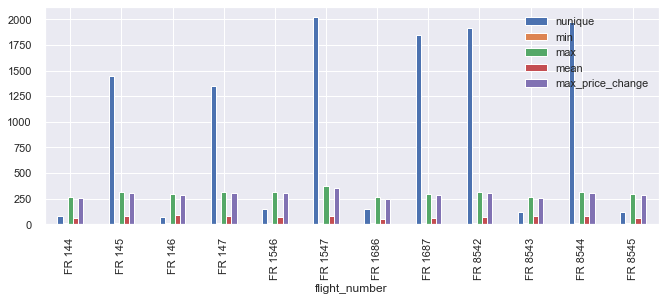

In [162]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
price_flight_number.plot(kind = 'bar')